# Multiple Linear Regression

In multiple linear regression, there are many independent variable i.e. features. y=b0+b1x1+b2x2+b3x3+........



In [1]:
# Import data
import pandas as pd

In [2]:
#Read CSV file using pandas
dataset=pd.read_csv('02Students.csv')

X= Number of hours studied in a week(Hours)

X=Number of Sleep hours by the student(shours)

Y= Marks obtained by a student Problem


To predict the marks if the student will study and sleep a definite hours

y=b0+b1x1+b2x2

In [3]:
dataset

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


In [4]:
df=dataset.copy()

In [5]:
#Split the data vertically into X and Y
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Split the dataset by rows into training and test datasets.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=1234)

In [8]:
#Create and train the simple multiple regression model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Create Regressor
std_reg=LinearRegression() 

In [11]:
#train and fit the traininng data

In [12]:
std_reg.fit(x_train,y_train)

LinearRegression()

In [13]:
#predict Y value from test data

In [14]:
y_predict=std_reg.predict(x_test)

In [15]:
y_predict

array([45.21343163, 55.94885949, 46.14934227, 40.78162834, 90.24716978,
       50.58114556])

In [16]:
y_test

7     45
10    56
4     42
1     36
28    82
8     53
Name: Marks, dtype: int64

R-square and equation of the line

mlr=multiple linear regression

R should be tends to 1 then your model will be good.

In [17]:
#calculate R Square
mlr_score=std_reg.score(x_test,y_test)

In [18]:
mlr_score

0.9137266559172476

In [19]:
#coefficient of the line

In [20]:
mlr_coefficient=std_reg.coef_
mlr_coefficient

array([4.89975861, 5.36771393])

In [21]:
#intercept of the line
slr_intercept=std_reg.intercept_
slr_intercept

-1.692127767070211

Equation of the line

y= -1.69 + 4.8*Hours + 5.3*shours

In [22]:
#How much error our model has made
#RMSE= Root mean Squared Error

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
import math

In [25]:
mlr_rmse=math.sqrt(mean_squared_error(y_test,y_predict))

In [26]:
mlr_rmse

4.358819513635103

Degree Of Freedom- The number of values in the final calculation of a statistic that are free to vary. 
                                                 
df=n-p-1 

n=sample size or number of observations

p=number of independent variable. 

Degree of freedom will increase then R-Squared will be reduced. Adding more variable increases value of R-Squared. Higher the value of R-Squared, variation in Y is better explained by variation in X.


If we increase the varibale, the we can get a good r square value but it will also give us a noise in data set. Then Adjusted R square has come in the picture.

Adjusted R Square= When We will add the variable, we can increase the Rsquare value but if we keep adding the value to get a higher Rsquare,
then We will reach a point where the adjusted Rsquare will decrease the, we can identify upto which point, we can add the variable.

Multiple Linear regression assumption-

1)Linear relationship- Dependent and Independent Feature have linear relationship.
                       Can be Postive or Negative Coorelation.
                       Can be checked using Pearson Correlation Coefficient as well as visualisation by ploting scatter plot. After visulaization, if the data is linear then it is good. If the data is non linear then we will tansform the data by log or exponantial Transformation.
                       
                   

2) Multicollinearity- No Multicollinearity should be there after visualisation and pearson corelation coefficient..

3) AutoCorrelation- The value of one record for the same variable or feature is dependent on the value from the same column but of diffrent record.

We can plot autocorrelation to check.

Autocorrelation Plot

In [28]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#Read CSV file
f= pd.read_csv('03 - corr.csv')

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.18266407, 0.24523169, 0.3102569 , 0.37862065, 0.4524715 ,
        0.5446227 , 0.65713006, 0.7718786 , 0.879378  , 0.96169895,
        1.        , 0.96169895, 0.879378  , 0.7718786 , 0.65713006,
        0.5446227 , 0.4524715 , 0.37862065, 0.3102569 , 0.24523169,
        0.18266407], dtype=float32),
 <matplotlib.lines.Line2D at 0x1dc3fce7d00>)

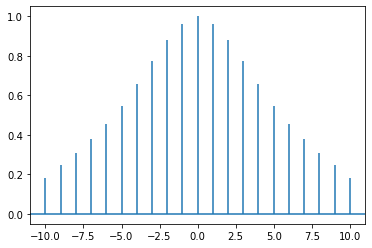

In [33]:
#plot autocorrelation
f['t0']=pd.to_numeric(f['t0'],downcast='float') #Changed the column f['t0'] to float format.
plt.acorr(f['t0'],maxlags=10)

In [34]:
#Use Pandas Shift function to create a timelag dataset as t_1 and t_2
t_1=f['t0'].shift(+1).to_frame()
t_2=f['t0'].shift(+2).to_frame()

In [35]:
t_1

,t0
0,NaN
1,8.0
2,14.0
3,36.0
4,56.0
5,84.0
6,94.0
7,106.0
8,110.0
9,93.0


In [36]:
t_2

,t0
0,NaN
1,NaN
2,8.0
3,14.0
4,36.0
5,56.0
6,84.0
7,94.0
8,106.0
9,110.0


4) Endogenity- Situations in which an explanatory/independent variable is correalted with the error term. No endogenity should be there.

5) Normality of Residual-

6) Presence of Homoscedasticity-